In [613]:
# Himani Parikh
# Intro to Data Mining
# Description: Social Media Data Mining: Using Twitter 

# extract 100 - 1000 tweets for the same topic (#tag) over the next couple of days.  Then write another ipynb to:
# Create a pandas DataFrame with the following:
  # Twitter ID
  # isRetweet
  # Sentiment
# Use seaborn to display the results in a chart.


# History
# scl   10/11/2022    Signed up for a developers account with twitter to get access
# scl   10/15/2022    initial version
# scl   10/17/2022    Version_1.0

In [614]:
!pip install tweepy==4.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [615]:
import pandas as pd
import tweepy as tw
import seaborn as sns
import requests
import json
from textblob import TextBlob
import matplotlib.pyplot as plt
import re

In [616]:
#Authentication and retrive all tweets
def f_retrive_tweets():
  tweets = []
  client = tw.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAJ2ciAEAAAAAX1E4fRknvtxxTjwwLo7SeRGwJmQ%3D6sxDkEBfCbEBIHTt1NQ6xwGv0haoK5ujQVLA2QKQhWk032rD2m')
  query = '#vegan'
  for tweet in tw.Paginator(client.search_recent_tweets,
                                      query = query,
                                      start_time = "2022-10-16T00:00:00Z",
                                      end_time = "2022-10-17T20:05:00Z",
                                      tweet_fields = ['id','text', 'created_at','public_metrics'],
                                      max_results = 50).flatten(limit=1000):
      tweets.append(tweet)
  return tweets

In [617]:
#Prepare tweet/text for analysis
def f_prepare_tweet(text):
    text = text.lower()
    # Removes @username
    text = re.sub(r'(@[A-Za-z0-9_]+)', '', text)
    # removes url
    text = re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text)
    # removes punctuation
    text = re.sub(r'[^\w\s]', '', text)
    return " ".join(text.split())

In [618]:
#Prepare semantic analysis
def analysis(text):
  text = f_prepare_tweet(text)
  semantic_obj = TextBlob(text)
  if semantic_obj.sentiment.polarity>0:
    return 'positive'
  elif semantic_obj.sentiment.polarity<0:
    return 'negative'
  else:
    return 'neutral'

In [619]:
def main():
  result = []
  for tweet in f_retrive_tweets():
    if(tweet.public_metrics['retweet_count'] != 0):
      result.append({'twitter_id': tweet.id,
                      'text': tweet.text,
                      'retweets': True,
                      'sentiment': analysis(tweet.text),
                      'created_at': tweet.created_at,
                    })
    else:
      result.append({'twitter_id': tweet.id,
                      'text': tweet.text,
                      'retweets': False,
                      'sentiment': analysis(tweet.text),
                      'created_at': tweet.created_at,
                    })

  df = pd.DataFrame(result)
  return df

,twitter_id,text,retweets,sentiment,created_at
0,1582100335107006465,Erbseneintopf. Ohne Schwein. Trotzdem nicht #V...,True,neutral,2022-10-17 20:04:48+00:00
1,1582100321949863936,RT @vee_gang: This was bloody delicious #Vegan...,True,positive,2022-10-17 20:04:45+00:00
2,1582100294090907648,RT @multidissimo: Wenn ich kurz nach 9 Uhr sch...,True,neutral,2022-10-17 20:04:38+00:00
3,1582100229163462657,RT @teamveganfta: Have you ever ridden on the ...,True,neutral,2022-10-17 20:04:23+00:00
4,1582100147575455747,🎯Don’t miss out!🎯\n💥Lucia Floral Pink Dress by...,False,negative,2022-10-17 20:04:03+00:00
...,...,...,...,...,...
995,1582049320073060353,Here Is Exactly Where to Find Taco Bell’s New ...,False,positive,2022-10-17 16:42:05+00:00
996,1582049280449458178,These are just some of the reasons you should ...,False,neutral,2022-10-17 16:41:56+00:00
997,1582049217602027520,RT @MiMuawakening: if you see this beautiful s...,True,positive,2022-10-17 16:41:41+00:00
998,1582049213117890570,The 35 BEST Vegan Desserts - GypsyPlate\nhttps...,False,positive,2022-10-17 16:41:40+00:00


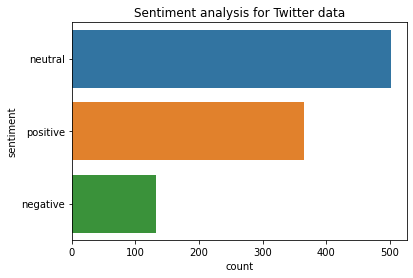

In [620]:
s = main()
view = sns.countplot(y="sentiment", data=s).set(title = 'Sentiment analysis for Twitter data')
s